# Random Forest

### Classification problem with handwritten digits

In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [5]:
digits.target[0]

0

In [6]:
digits.images[0] # actually one dimensionl array, 8 by 8 matrix, length of array is 64

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
len(digits.images[0])

8

<Figure size 432x288 with 0 Axes>

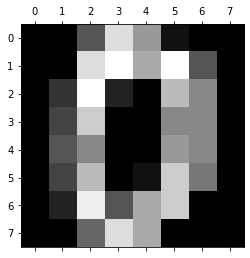

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])

In [9]:
#for i in range(4):
    #plt.matshow(digits.images[i])

In [10]:
df = pd.DataFrame(digits.data)

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [12]:
df.shape

(1797, 64)

In [13]:
df["target"] = digits.target

In [14]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop("target", axis = 1)
y = df["target"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [18]:
len(X_train)

1437

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rfm = RandomForestClassifier(criterion="gini", n_estimators=10) # it will create 10 random trees out of data

In [21]:
rfm.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
rfm.score(X_test, y_test)

0.95

In [23]:
y_preds = rfm.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
cm = confusion_matrix(y_test, y_preds)

In [26]:
cm

array([[37,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 43,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 29,  0,  1,  0],
       [ 0,  0,  0,  1,  2,  0,  0, 28,  0,  0],
       [ 0,  2,  1,  1,  0,  0,  1,  1, 33,  0],
       [ 0,  1,  1,  1,  0,  1,  0,  0,  0, 29]], dtype=int64)

In [27]:
import seaborn as sns

Text(69.0, 0.5, 'y_test')

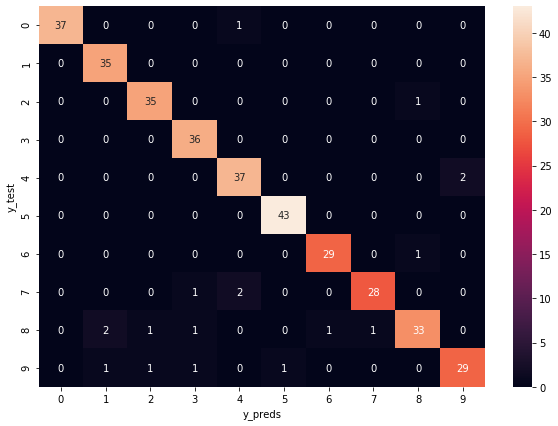

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("y_preds")
plt.ylabel("y_test")

### Iris flower dataset example

In [31]:
from sklearn.datasets import load_iris

In [32]:
iris = load_iris()

In [33]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [35]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [36]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [37]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [48]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [39]:
len(iris.target)

150

In [42]:
df = pd.DataFrame(data= iris.data, columns = iris.feature_names)

In [43]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [45]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [46]:
df["target"] = iris.target

In [47]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [50]:
df["target_names"] = df.target.map({0:'setosa', 1:'versicolor', 2:'virginica'})

In [51]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [52]:
from sklearn.model_selection import train_test_split

In [54]:
X = df.drop(["target", "target_names"], axis =1)
y=df["target"]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rfm = RandomForestClassifier()

In [59]:
rfm.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
rfm.score(X_test, y_test)

0.9333333333333333

In [61]:
preds = rfm.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
confusion_matrix(y_test, preds)

array([[10,  0,  0],
       [ 0, 11,  0],
       [ 0,  2,  7]], dtype=int64)

Text(33.0, 0.5, 'y_test')

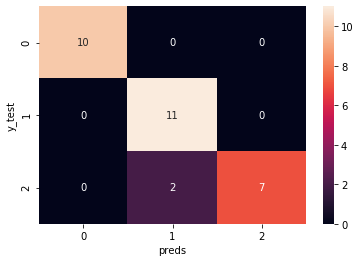

In [68]:
sns.heatmap(confusion_matrix(y_test, preds), annot=True)
plt.xlabel("preds")
plt.ylabel("y_test")

In [70]:
rfm.predict([[2.3, 3.3, 6, 8]])

array([2])

In [71]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df=pd.read_pickle("saved_df.pkl")

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.shape

(707, 9)

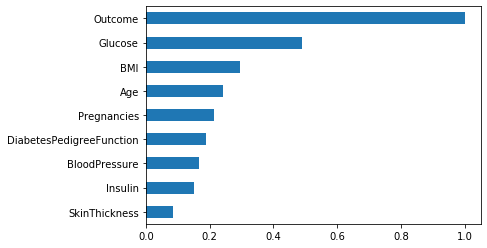

In [10]:
df.corr()["Outcome"].sort_values().plot.barh()

In [11]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, stratify=y, random_state=42)#yleri de eşit şekilde dağıtıyor

In [19]:
rfmod=RandomForestClassifier().fit(X_train, y_train)

In [20]:
y_pred=rfmod.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        94
           1       0.62      0.58      0.60        48

    accuracy                           0.74       142
   macro avg       0.71      0.70      0.70       142
weighted avg       0.74      0.74      0.74       142



In [21]:
# RF Tuning

In [22]:
rf = RandomForestClassifier()

In [23]:
rf_params ={"n_estimators":[50,100,300],
                 "max_depth":[1,3,5,7],
                 "max_features": [2,4,6,8],
                 "min_samples_split": [2,4,6]}

In [24]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  2.5min finished


In [31]:
rf_cv_model.best_params_

{'max_depth': 5,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [40]:
rf_tuned = RandomForestClassifier(max_depth = 9,
                                  max_features = 3,
                                  min_samples_split = 4,
                                  n_estimators = 1000).fit(X_train, y_train)

In [41]:
y_pred=rfmod.predict(X_test)
confusion_matrix(y_test, y_pred)


array([[77, 17],
       [20, 28]], dtype=int64)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        94
           1       0.62      0.58      0.60        48

    accuracy                           0.74       142
   macro avg       0.71      0.70      0.70       142
weighted avg       0.74      0.74      0.74       142



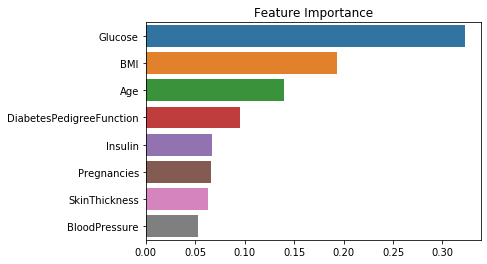

In [35]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()